In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [2]:
import numpy as np
from glob import glob


In [3]:
# re-size all the images to this
IMAGE_SIZE = [128, 128]

train_path = r"C:\Users\aman\Desktop\TOMATO LEAF PREDICTION\train"
valid_path = r"C:\Users\aman\Desktop\TOMATO LEAF PREDICTION\val"

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 

In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False


In [6]:
# Get the list of folders (each representing a class) in the training directory
folders = glob(train_path + '/*')
# Count the number of folders, which equals the number of output classes
num_classes = len(folders)

# Print the number of output classes
print("Number of output classes:", num_classes)

Number of output classes: 10


In [7]:
# Now you can use this number in your model architecture to ensure consistency
x = Flatten()(resnet.output)
prediction = Dense(num_classes, activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)


In [9]:
# view the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 23,915,402 (91.23 MB)

 Trainable params: 327,690 (1.25 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 10000 images belonging to 10 classes.


In [13]:
test_set = test_datagen.flow_from_directory(
    valid_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 1001 images belonging to 10 classes.


In [14]:
# fit the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10


C:\Users\aman\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.1784 - loss: 2.2570 - val_accuracy: 0.3397 - val_loss: 1.8386
Epoch 2/10


C:\Users\aman\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 468s 1s/step - accuracy: 0.3335 - loss: 1.8917 - val_accuracy: 0.4216 - val_loss: 1.6834
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 270s 857ms/step - accuracy: 0.3852 - loss: 1.7570 - val_accuracy: 0.4266 - val_loss: 1.7040
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 272s 862ms/step - accuracy: 0.4151 - loss: 1.6812 - val_accuracy: 0.4605 - val_loss: 1.5802
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━

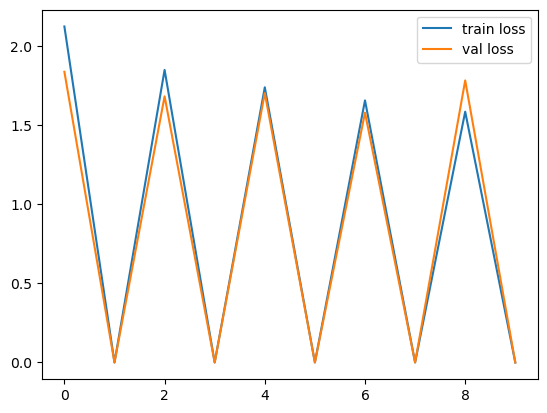

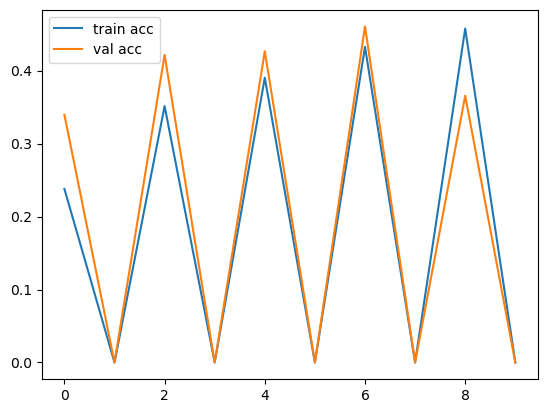

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [17]:
y_pred = model.predict(test_set)

32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 738ms/step


In [18]:
y_pred 

array([[9.04538378e-04, 1.82131864e-02, 1.14909448e-02, ...,
        4.08419175e-03, 1.20345645e-01, 5.42133629e-01],
       [7.29174241e-02, 1.26360610e-01, 3.90686058e-02, ...,
        1.24448143e-01, 9.97709036e-02, 1.41650692e-01],
       [4.33610193e-02, 9.58598852e-02, 1.64929517e-02, ...,
        3.14395018e-02, 1.36730699e-02, 2.00249404e-01],
       ...,
       [8.81140841e-06, 8.31174254e-02, 5.04349265e-03, ...,
        1.04118706e-04, 8.75456772e-06, 6.11083806e-01],
       [3.38045098e-02, 1.44693451e-02, 8.64770450e-03, ...,
        1.00568766e-02, 1.31908329e-02, 8.53500187e-01],
       [1.90332122e-02, 3.32190730e-02, 2.30615027e-02, ...,
        6.69259354e-02, 2.08686277e-01, 4.78581488e-01]], dtype=float32)

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([9, 6, 6, ..., 9, 9, 9], dtype=int64)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('model_resnet50.h5')

In [23]:
y_pred = model.predict(test_set)

32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 745ms/step


In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_resnet50.h5')

In [26]:
img=image.load_img(r"C:\Users\aman\Desktop\TOMATO LEAF PREDICTION\val\Tomato___healthy\1ddf5950-e27f-4928-8f4e-33242953e306___RS_HL 0181.JPG",target_size=(128,128))
x=image.img_to_array(img)

In [27]:
x=image.img_to_array(img)
x

array([[[130., 118., 132.],
        [156., 144., 158.],
        [136., 124., 138.],
        ...,
        [ 91.,  79.,  89.],
        [145., 133., 143.],
        [121., 109., 119.]],

       [[195., 183., 197.],
        [192., 180., 194.],
        [162., 150., 164.],
        ...,
        [145., 133., 143.],
        [176., 164., 174.],
        [166., 154., 164.]],

       [[139., 127., 141.],
        [156., 144., 158.],
        [ 82.,  70.,  84.],
        ...,
        [118., 106., 116.],
        [115., 103., 113.],
        [130., 118., 128.]],

       ...,

       [[164., 162., 175.],
        [193., 191., 204.],
        [191., 189., 202.],
        ...,
        [113., 110., 117.],
        [138., 135., 142.],
        [101.,  98., 105.]],

       [[172., 170., 183.],
        [141., 139., 152.],
        [164., 162., 175.],
        ...,
        [142., 139., 146.],
        [170., 167., 174.],
        [161., 158., 165.]],

       [[129., 127., 140.],
        [179., 177., 190.],
        [131., 1

In [28]:
x.shape

(128, 128, 3)

In [29]:
x=x/255

In [30]:
import numpy as np
x=np.expand_dims(x,axis=0)
from keras.applications.resnet50 import preprocess_input
img_data=preprocess_input(x)
img_data.shape

(1, 128, 128, 3)

In [31]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [32]:
model.predict(img_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[1.02159447e-06, 2.23180931e-03, 1.13474416e-04, 4.65844385e-03,
        1.57522585e-03, 5.65730573e-08, 5.81366635e-08, 2.11355933e-10,
        6.74595526e-07, 9.91419315e-01]], dtype=float32)

In [33]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [34]:
a==9

array([ True])